In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data into a dataframe

In [3]:
admission_data = pd.read_csv('merged_data.csv')

Data exploration and cleaning

In [4]:
admission_data

,financialyear,ca,agegroup,sex,injurylocation,injurytype,numberofadmissions,caname,hbname,country
0,2022/23,S12000039,75plus years,Female,Undisclosed,Other,3,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
1,2022/23,S12000039,75plus years,Female,Undisclosed,Accidental Exposure,9,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
2,2022/23,S12000039,75plus years,Female,Undisclosed,Scalds,1,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
3,2022/23,S12000039,75plus years,Female,Undisclosed,Crushing,0,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
4,2022/23,S12000039,75plus years,Female,Undisclosed,"Struck by, against",0,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
...,...,...,...,...,...,...,...,...,...,...
473467,2013/14,S12000038,All,All,All,"Struck by, against",67,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
473468,2013/14,S12000038,All,All,All,Falls,1180,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
473469,2013/14,S12000038,All,All,All,Poisoning,118,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
473470,2013/14,S12000038,All,All,All,RTA,74,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003


Question 1: Number of admissions in 2022/23

In [6]:
admissions_2022_23 = admission_data[(admission_data['financialyear'] == '2022/23')]
num_admissions = len(admissions_2022_23)

In [7]:
admissions_2022_23

,financialyear,ca,agegroup,sex,injurylocation,injurytype,numberofadmissions,caname,hbname,country
0,2022/23,S12000039,75plus years,Female,Undisclosed,Other,3,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
1,2022/23,S12000039,75plus years,Female,Undisclosed,Accidental Exposure,9,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
2,2022/23,S12000039,75plus years,Female,Undisclosed,Scalds,1,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
3,2022/23,S12000039,75plus years,Female,Undisclosed,Crushing,0,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
4,2022/23,S12000039,75plus years,Female,Undisclosed,"Struck by, against",0,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
...,...,...,...,...,...,...,...,...,...,...
462631,2022/23,S12000038,All,All,All,"Struck by, against",67,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
462632,2022/23,S12000038,All,All,All,Falls,1288,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
462633,2022/23,S12000038,All,All,All,Poisoning,118,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
462634,2022/23,S12000038,All,All,All,RTA,63,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003


In [8]:
total_admissions_2022_23 = admissions_2022_23['numberofadmissions'].sum()
print("Number of admissions in 2022/23: ", total_admissions_2022_23)

Number of admissions in 2022/23:  1084296


Question 2: What percentage of these admissions were for falls?

In [9]:
falls_admissions_2022_23 = admissions_2022_23[admissions_2022_23['injurytype'] == 'Falls']

In [10]:
print(falls_admissions_2022_23['numberofadmissions'].sum())

356888


In [11]:
total_falls_admissions = falls_admissions_2022_23['numberofadmissions'].sum()
percentage_falls = (total_falls_admissions / total_admissions_2022_23) * 100
percentage_falls_rounded = round(percentage_falls, 1)
print("Percentage of admissions for falls in 2022/23: ", percentage_falls_rounded)

Percentage of admissions for falls in 2022/23:  32.9


Question 3: Which health board had the largest percentage change in unintentional injuries admissions between 2020/21 and 2021/22?

In [13]:
# Filter data for the years 2020/21 and 2021/22
# Group by health board and sum the number of admissions for each year
years_2020_21_22 = admission_data[(admission_data['financialyear'].isin(['2020/21','2021/22']))]
total_admissions_by_health_board = years_2020_21_22.groupby(['hbname','financialyear'])['numberofadmissions'].sum().reset_index()

In [14]:
years_2020_21_22

,financialyear,ca,agegroup,sex,injurylocation,injurytype,numberofadmissions,caname,hbname,country
1179,2021/22,S12000039,75plus years,Female,Undisclosed,Other,2,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
1180,2021/22,S12000039,75plus years,Female,Undisclosed,Accidental Exposure,9,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
1181,2021/22,S12000039,75plus years,Female,Undisclosed,Scalds,0,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
1182,2021/22,S12000039,75plus years,Female,Undisclosed,Crushing,0,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
1183,2021/22,S12000039,75plus years,Female,Undisclosed,"Struck by, against",1,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
...,...,...,...,...,...,...,...,...,...,...
465034,2020/21,S12000038,All,All,All,"Struck by, against",49,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
465035,2020/21,S12000038,All,All,All,Falls,1026,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
465036,2020/21,S12000038,All,All,All,Poisoning,121,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
465037,2020/21,S12000038,All,All,All,RTA,55,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003


In [16]:
# Pivot the table to have years as columns
pivot_health_board = total_admissions_by_health_board.pivot(index='hbname', columns='financialyear', values ='numberofadmissions')

In [17]:
pivot_health_board

financialyear,2020/21,2021/22
hbname,,
NHS Ayrshire and Arran,63120,66456
NHS Borders,16840,17904
NHS Dumfries and Galloway,25904,27072
NHS Fife,66744,70240
NHS Forth Valley,48192,55952
NHS Grampian,86648,84520
NHS Greater Glasgow and Clyde,287968,302424
NHS Highland,51768,49200
NHS Lanarkshire,154536,164520


In [18]:
# Calculate the percentage change
pivot_health_board['percentagechange'] = ((pivot_health_board['2021/22'] - pivot_health_board['2020/21']) / pivot_health_board['2020/21']) * 100


In [19]:
max_percentage_change_health_board = pivot_health_board['percentagechange'].idxmax()
print("Health board with the largest percentage change in unintentional injuries admissions (2020/21 to 2021/22):", max_percentage_change_health_board)

Health board with the largest percentage change in unintentional injuries admissions (2020/21 to 2021/22): NHS Forth Valley


Question 3:

a) Which health board had the highest number of admissions for road traffic accidents (RTA) in 2019/20?

b) What percentage of these admissions were for males?

In [21]:
rta_2019_20 = admission_data[(admission_data['financialyear'] == '2019/20') & (admission_data['injurytype'] == 'RTA')]

In [22]:
total_admissions_by_board_rta = rta_2019_20.groupby('hbname')['numberofadmissions'].sum().reset_index()
max_admissions_board_rta = total_admissions_by_board_rta.loc[total_admissions_by_board_rta['numberofadmissions'].idxmax()]
print("Health board with the highest number of admissions for RTAs in 2019/20:", max_admissions_board_rta['hbname'])

Health board with the highest number of admissions for RTAs in 2019/20: NHS Greater Glasgow and Clyde


Using .loc in this context is a way to locate the row with the maximum number of admissions in the grouped DataFrame by index which is labeled. Can use .iloc to locate the row by integer position. The .idxmax() method returns the index of the first occurrence of the maximum value in a Series.

In [23]:
males_rta_2019_20 = rta_2019_20[rta_2019_20['sex'] == 'Male']
total_admissions_males = males_rta_2019_20['numberofadmissions'].sum()

In [27]:
total_admissions_males

9544

In [28]:
max_admissions_board_rta

hbname                NHS Greater Glasgow and Clyde
numberofadmissions                             7528
Name: 6, dtype: object

Now that we identified NHS Greater Glasgow and Clyde as the health board with the highest RTAs. Let's look how many percentages of male invovled in RTAs

In [29]:
# Check the data for road traffic accidents in 2019/20 in NHS Greater Glasgow and Clyde
rta_glasgow_clyde_2019_20 = rta_2019_20[rta_2019_20['hbname'] == 'NHS Greater Glasgow and Clyde']

# Calculate the total admissions for road traffic accidents in NHS Greater Glasgow and Clyde in 2019/20
total_rta_glasgow_clyde_2019_20 = rta_glasgow_clyde_2019_20['numberofadmissions'].sum()

# Calculate the total admissions for males in road traffic accidents in NHS Greater Glasgow and Clyde in 2019/20
total_admissions_males_2019_20 = rta_glasgow_clyde_2019_20[rta_glasgow_clyde_2019_20['sex'] == 'Male']['numberofadmissions'].sum()

# Calculate the percentage
percentage_males_2019_20 = (total_admissions_males_2019_20 / total_rta_glasgow_clyde_2019_20) * 100
percentage_males_rounded = round(percentage_males_2019_20, 1)
print("Total admissions for road traffic accidents in NHS Greater Glasgow and Clyde (2019/20):", total_rta_glasgow_clyde_2019_20)
print("Total admissions for males in road traffic accidents in NHS Greater Glasgow and Clyde (2019/20):", total_admissions_males_2019_20)
print("Percentage of admissions for males in road traffic accidents (2019/20):", percentage_males_rounded)

Total admissions for road traffic accidents in NHS Greater Glasgow and Clyde (2019/20): 7528
Total admissions for males in road traffic accidents in NHS Greater Glasgow and Clyde (2019/20): 2504
Percentage of admissions for males in road traffic accidents (2019/20): 33.3


Question 4: What was the percentage change in admissions for scalds in the home in NHS Lothian Health Board from 2019/20 to 2020/21?

In [30]:
scalds_2019_20 = admission_data[(admission_data['financialyear'] == '2019/20') &
                            (admission_data['injurytype'] == 'Scalds') &
                            (admission_data['injurylocation'] == 'Home') &
                            (admission_data['hbname'] == 'NHS Lothian')]

scalds_2020_21 = admission_data[(admission_data['financialyear'] == '2020/21') &
                            (admission_data['injurytype'] == 'Scalds') &
                            (admission_data['injurylocation'] == 'Home') &
                            (admission_data['hbname'] == 'NHS Lothian')]

In [31]:
scalds_2019_20

,financialyear,ca,agegroup,sex,injurylocation,injurytype,numberofadmissions,caname,hbname,country
202943,2019/20,S12000040,75plus years,Female,Home,Scalds,1,West Lothian,NHS Lothian,S92000003
202988,2019/20,S12000040,75plus years,Male,Home,Scalds,1,West Lothian,NHS Lothian,S92000003
203033,2019/20,S12000040,75plus years,All,Home,Scalds,2,West Lothian,NHS Lothian,S92000003
203078,2019/20,S12000040,65-74 years,Female,Home,Scalds,0,West Lothian,NHS Lothian,S92000003
203123,2019/20,S12000040,65-74 years,Male,Home,Scalds,0,West Lothian,NHS Lothian,S92000003
...,...,...,...,...,...,...,...,...,...,...
274457,2019/20,S12000019,0-4 years,Male,Home,Scalds,2,Midlothian,NHS Lothian,S92000003
274502,2019/20,S12000019,0-4 years,All,Home,Scalds,2,Midlothian,NHS Lothian,S92000003
274547,2019/20,S12000019,All,Female,Home,Scalds,0,Midlothian,NHS Lothian,S92000003
274592,2019/20,S12000019,All,Male,Home,Scalds,2,Midlothian,NHS Lothian,S92000003


In [32]:
scalds_2020_21

,financialyear,ca,agegroup,sex,injurylocation,injurytype,numberofadmissions,caname,hbname,country
201737,2020/21,S12000040,75plus years,Female,Home,Scalds,0,West Lothian,NHS Lothian,S92000003
201782,2020/21,S12000040,75plus years,Male,Home,Scalds,1,West Lothian,NHS Lothian,S92000003
201827,2020/21,S12000040,75plus years,All,Home,Scalds,1,West Lothian,NHS Lothian,S92000003
201872,2020/21,S12000040,65-74 years,Female,Home,Scalds,0,West Lothian,NHS Lothian,S92000003
201917,2020/21,S12000040,65-74 years,Male,Home,Scalds,0,West Lothian,NHS Lothian,S92000003
...,...,...,...,...,...,...,...,...,...,...
273260,2020/21,S12000019,0-4 years,Male,Home,Scalds,1,Midlothian,NHS Lothian,S92000003
273296,2020/21,S12000019,0-4 years,All,Home,Scalds,1,Midlothian,NHS Lothian,S92000003
273341,2020/21,S12000019,All,Female,Home,Scalds,0,Midlothian,NHS Lothian,S92000003
273386,2020/21,S12000019,All,Male,Home,Scalds,2,Midlothian,NHS Lothian,S92000003


In [33]:
total_admissions_2019_20 = scalds_2019_20['numberofadmissions'].sum()
total_admissions_2020_21 = scalds_2020_21['numberofadmissions'].sum()

In [34]:
percentage_change_scalds = ((total_admissions_2020_21 - total_admissions_2019_20) / total_admissions_2019_20) * 100
scalds_rounded = round(percentage_change_scalds, 1)

In [35]:
print("Total admissions for scalds in the home in NHS Lothian (2019/20):", total_admissions_2019_20)
print("Total admissions for scalds in the home in NHS Lothian (2020/21):", total_admissions_2020_21)
print("Percentage change in admissions for scalds in the home in NHS Lothian (2019/20 to 2020/21):", scalds_rounded)

Total admissions for scalds in the home in NHS Lothian (2019/20): 260
Total admissions for scalds in the home in NHS Lothian (2020/21): 320
Percentage change in admissions for scalds in the home in NHS Lothian (2019/20 to 2020/21): 23.1


In [36]:
north_ayrshire_all_injuries = admission_data[(admission_data['financialyear'].isin(['2017/18', '2018/19', '2019/20', '2020/21', '2021/22', '2022/23'])) &
                                         (admission_data['injurytype'] == 'All Diagnoses') &
                                         (admission_data['ca'] == 'S12000021') &
                                         (admission_data['caname'] == 'North Ayrshire')]

In [37]:
north_ayrshire_all_injuries

,financialyear,ca,agegroup,sex,injurylocation,injurytype,numberofadmissions,caname,hbname,country
233702,2022/23,S12000021,75plus years,Female,Undisclosed,All Diagnoses,58,North Ayrshire,NHS Ayrshire and Arran,S92000003
233711,2022/23,S12000021,75plus years,Female,Other,All Diagnoses,51,North Ayrshire,NHS Ayrshire and Arran,S92000003
233720,2022/23,S12000021,75plus years,Female,Not Applicable,All Diagnoses,7,North Ayrshire,NHS Ayrshire and Arran,S92000003
233729,2022/23,S12000021,75plus years,Female,Home,All Diagnoses,216,North Ayrshire,NHS Ayrshire and Arran,S92000003
233738,2022/23,S12000021,75plus years,Female,All,All Diagnoses,332,North Ayrshire,NHS Ayrshire and Arran,S92000003
...,...,...,...,...,...,...,...,...,...,...
245702,2021/22,S12000021,65-74 years,Female,Not Applicable,All Diagnoses,1,North Ayrshire,NHS Ayrshire and Arran,S92000003
245711,2021/22,S12000021,65-74 years,Female,Home,All Diagnoses,73,North Ayrshire,NHS Ayrshire and Arran,S92000003
245720,2021/22,S12000021,65-74 years,Female,All,All Diagnoses,138,North Ayrshire,NHS Ayrshire and Arran,S92000003
245729,2021/22,S12000021,65-74 years,Male,Undisclosed,All Diagnoses,46,North Ayrshire,NHS Ayrshire and Arran,S92000003


In [38]:
total_admissions_by_year_north_ayrshire = north_ayrshire_all_injuries.groupby('financialyear')['numberofadmissions'].sum()

In [39]:
yearly_average_north_ayrshire = total_admissions_by_year_north_ayrshire.mean()
yearly_average_north_ayrshire_rounded = round(yearly_average_north_ayrshire, 1)

In [40]:
print("Yearly Average number of admissions for all unintentional injuries in the North Ayrshire council area: ", yearly_average_north_ayrshire_rounded)

Yearly Average number of admissions for all unintentional injuries in the North Ayrshire council area:  12385.3


Question 6:

In Perth and Kinross Council area in 2022/23, what percentage of admissions for falls occurred in the home?

In [41]:
falls_perth_kinross_2022_23 = admission_data[
    (admission_data['financialyear'] == '2022/23') &
    (admission_data['injurytype'] == 'Falls') &
    (admission_data['ca'] == 'S12000048') &
    (admission_data['injurylocation'] == 'Home')
]

In [42]:
falls_perth_kinross_2022_23

,financialyear,ca,agegroup,sex,injurylocation,injurytype,numberofadmissions,caname,hbname,country
377978,2022/23,S12000048,75plus years,Female,Home,Falls,348,Perth and Kinross,NHS Tayside,S92000003
378023,2022/23,S12000048,75plus years,Male,Home,Falls,152,Perth and Kinross,NHS Tayside,S92000003
378068,2022/23,S12000048,75plus years,All,Home,Falls,500,Perth and Kinross,NHS Tayside,S92000003
378113,2022/23,S12000048,65-74 years,Female,Home,Falls,82,Perth and Kinross,NHS Tayside,S92000003
378158,2022/23,S12000048,65-74 years,Male,Home,Falls,39,Perth and Kinross,NHS Tayside,S92000003
378203,2022/23,S12000048,65-74 years,All,Home,Falls,121,Perth and Kinross,NHS Tayside,S92000003
378248,2022/23,S12000048,45-64 years,Female,Home,Falls,43,Perth and Kinross,NHS Tayside,S92000003
378293,2022/23,S12000048,45-64 years,Male,Home,Falls,24,Perth and Kinross,NHS Tayside,S92000003
378338,2022/23,S12000048,45-64 years,All,Home,Falls,67,Perth and Kinross,NHS Tayside,S92000003
378383,2022/23,S12000048,25-44 years,Female,Home,Falls,5,Perth and Kinross,NHS Tayside,S92000003


In [43]:
# Finding total admissions for falls at home in Perth and Kinross in 2022/23
home_falls_perth_kinross_2022_23 = falls_perth_kinross_2022_23['numberofadmissions'].sum()

In [44]:
every_single_location_injury_falls_perth_kinross_2022_23 = admission_data[
    (admission_data['financialyear'] == '2022/23') &
    (admission_data['injurytype'] == 'Falls') &
    (admission_data['ca'] == 'S12000048')
]

In [45]:
every_single_location_injury_falls_perth_kinross_2022_23

,financialyear,ca,agegroup,sex,injurylocation,injurytype,numberofadmissions,caname,hbname,country
377951,2022/23,S12000048,75plus years,Female,Undisclosed,Falls,42,Perth and Kinross,NHS Tayside,S92000003
377960,2022/23,S12000048,75plus years,Female,Other,Falls,143,Perth and Kinross,NHS Tayside,S92000003
377969,2022/23,S12000048,75plus years,Female,Not Applicable,Falls,0,Perth and Kinross,NHS Tayside,S92000003
377978,2022/23,S12000048,75plus years,Female,Home,Falls,348,Perth and Kinross,NHS Tayside,S92000003
377987,2022/23,S12000048,75plus years,Female,All,Falls,533,Perth and Kinross,NHS Tayside,S92000003
...,...,...,...,...,...,...,...,...,...,...
379094,2022/23,S12000048,All,All,Undisclosed,Falls,260,Perth and Kinross,NHS Tayside,S92000003
379103,2022/23,S12000048,All,All,Other,Falls,417,Perth and Kinross,NHS Tayside,S92000003
379112,2022/23,S12000048,All,All,Not Applicable,Falls,0,Perth and Kinross,NHS Tayside,S92000003
379121,2022/23,S12000048,All,All,Home,Falls,731,Perth and Kinross,NHS Tayside,S92000003


In [47]:
# Calculate the total admissions for all falls in all location types in Perth and Kinross
total_all_falls_perth_kinross_2022_23 = every_single_location_injury_falls_perth_kinross_2022_23['numberofadmissions'].sum()

In [48]:
total_all_falls_perth_kinross_2022_23

11264

In [49]:
home_falls_perth_kinross_2022_23

2924

In [50]:
percentage_falls_in_home_perth_kinross_2022_23 = (home_falls_perth_kinross_2022_23 / total_all_falls_perth_kinross_2022_23) * 100

In [51]:
percentage_falls_in_home_perth_kinross_2022_23_rounded = round(percentage_falls_in_home_perth_kinross_2022_23, 1)

In [52]:
print("Percentage of admissions for falls in the home in Perth and Kinross (2022/23):", percentage_falls_in_home_perth_kinross_2022_23_rounded)

Percentage of admissions for falls in the home in Perth and Kinross (2022/23): 26.0


Question 7:

In Scotland in 2022/23, how many admissions for unintentional injuries were there for females aged 75+?  

In [53]:
injuries_females_75plus_scotland_2022_23 = admission_data[(admission_data['financialyear'] == '2022/23') &
                                                      (admission_data['sex'] == 'Female') &
                                                      (admission_data['agegroup'] == '75plus years')]

In [54]:
injuries_females_75plus_scotland_2022_23

,financialyear,ca,agegroup,sex,injurylocation,injurytype,numberofadmissions,caname,hbname,country
0,2022/23,S12000039,75plus years,Female,Undisclosed,Other,3,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
1,2022/23,S12000039,75plus years,Female,Undisclosed,Accidental Exposure,9,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
2,2022/23,S12000039,75plus years,Female,Undisclosed,Scalds,1,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
3,2022/23,S12000039,75plus years,Female,Undisclosed,Crushing,0,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
4,2022/23,S12000039,75plus years,Female,Undisclosed,"Struck by, against",0,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
...,...,...,...,...,...,...,...,...,...,...
461461,2022/23,S12000038,75plus years,Female,All,"Struck by, against",5,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
461462,2022/23,S12000038,75plus years,Female,All,Falls,442,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
461463,2022/23,S12000038,75plus years,Female,All,Poisoning,9,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
461464,2022/23,S12000038,75plus years,Female,All,RTA,0,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003


In [55]:
total_admissions_females_75plus_scotland_2022_23 = injuries_females_75plus_scotland_2022_23['numberofadmissions'].sum()

In [56]:
print("Number of admissions for unintentional injuries for females aged 75+ in Scotland (2022/23): ",total_admissions_females_75plus_scotland_2022_23)

Number of admissions for unintentional injuries for females aged 75+ in Scotland (2022/23):  68778


Question 8: 

Plot the number of admissions for unintentional injuries for males in 2022/23 by location type and health board 

In [57]:
injuries_males_2022_23 = admission_data[(admission_data['financialyear'] == '2022/23') &
                                    (admission_data['sex'] == 'Male')]

In [58]:
injuries_males_2022_23

,financialyear,ca,agegroup,sex,injurylocation,injurytype,numberofadmissions,caname,hbname,country
45,2022/23,S12000039,75plus years,Male,Undisclosed,Other,3,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
46,2022/23,S12000039,75plus years,Male,Undisclosed,Accidental Exposure,5,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
47,2022/23,S12000039,75plus years,Male,Undisclosed,Scalds,0,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
48,2022/23,S12000039,75plus years,Male,Undisclosed,Crushing,0,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
49,2022/23,S12000039,75plus years,Male,Undisclosed,"Struck by, against",0,West Dunbartonshire,NHS Greater Glasgow and Clyde,S92000003
...,...,...,...,...,...,...,...,...,...,...
462586,2022/23,S12000038,All,Male,All,"Struck by, against",47,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
462587,2022/23,S12000038,All,Male,All,Falls,524,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
462588,2022/23,S12000038,All,Male,All,Poisoning,57,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003
462589,2022/23,S12000038,All,Male,All,RTA,49,Renfrewshire,NHS Greater Glasgow and Clyde,S92000003


In [134]:
# Save the DataFrame to a CSV file
injuries_males_2022_23.to_csv('injuries_males_2022_23.csv', index=False)

C:\Users\digit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\digit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\digit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\digit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

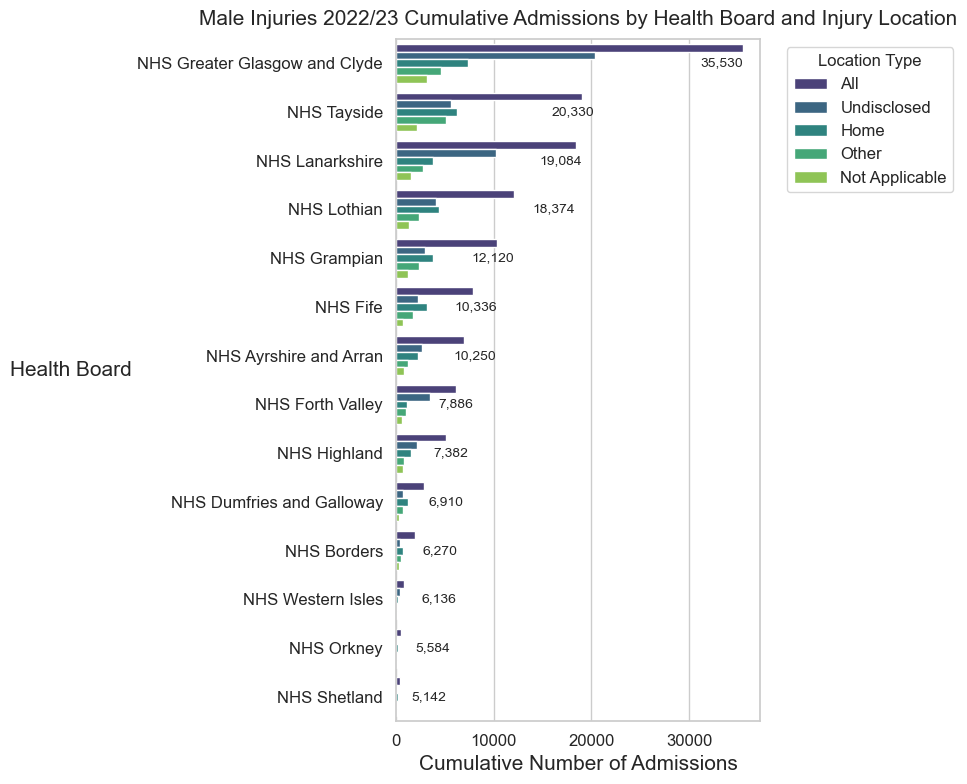

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have loaded your data into the "injuries_males_2022_23" DataFrame
injuries_males_2022_23 = pd.read_csv('injuries_males_2022_23.csv')

# Group by "Health Board" and "InjuryLocation" and sum the "NumberOfAdmissions" for each group
cumulative_data = injuries_males_2022_23.groupby(['hbname', 'injurylocation'])['numberofadmissions'].sum().reset_index()

# Sort the DataFrame by cumulative admissions in descending order
cumulative_data_sorted = cumulative_data.sort_values(by='numberofadmissions', ascending=False)

# Set a reasonable figure size
plt.figure(figsize=(10, 8))

# Plot the horizontal bar plot
sns.barplot(x='numberofadmissions', y='hbname', hue='injurylocation', data=cumulative_data_sorted, dodge=True, palette='viridis')

# Annotate each bar with its value
for index, value in enumerate(cumulative_data_sorted['numberofadmissions']):
    # Set a custom limit for the x-axis to prevent annotations from going beyond the graph
    plt.text(value, index, f'{value:,}', va='center', fontsize=10, ha='right', clip_on=True)  # Adjust ha for horizontal alignment

# Customize the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Cumulative Number of Admissions', fontsize=15)
plt.ylabel('Health Board', rotation=0, ha='right', fontsize=15)  # Rotate the ylabel horizontally
plt.title('Male Injuries 2022/23 Cumulative Admissions by Health Board and Injury Location', pad=10, fontsize=15)
plt.legend(title='Location Type', title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()  # Adjust layout for better visualization
plt.savefig('male_injuries_2022_23.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()